In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Check photon absorbtion in scintillator

In [2]:
path = '/Users/erezcohen/Desktop/data/DuSiHodSim/output/csv_files/';

In [54]:
TrappingEff = []
TrappingEffErr = []
sim_results = pd.read_csv(path + 'version_5.0_n_1.50_emit_from_center_photons.csv');
Narrived = len(sim_results[sim_results.ArrivedAtFrontFacet==1])
Ntotal = len(sim_results)

frac_absorbed_in_bin = []
l_in_bin = []
l_array = np.linspace(0,10000,10)
for i in np.arange(0,len(l_array)-1):
    sim_results_in_bin = sim_results[(sim_results.TotalPathLength>l_array[i])
                                     & (sim_results.TotalPathLength<=l_array[i+1])]
    N_in    len(sim_results_in_bin)
#     print len(sim_results_in_bin)
    if len(sim_results_in_bin)>0:
        l_in_bin.append( np.mean(sim_results_in_bin.TotalPathLength) )
        frac_absorbed_in_bin.append( float(len(sim_results_in_bin[sim_results_in_bin.AbsorbedInScintillator==1]) ) 
                                    / len(sim_results_in_bin) )
    else:
        l_in_bin.append( 0.5*(l_array[i] + l_array[i+1]) )
        frac_absorbed_in_bin.append(0);
frac_absorbed_in_bin = np.array(frac_absorbed_in_bin)

In [55]:
frac_absorbed_in_bin

array([0.03043968, 0.1399177 , 0.1875    , 0.33333333, 0.45833333,
       1.        , 0.66666667, 0.        , 0.76056338])

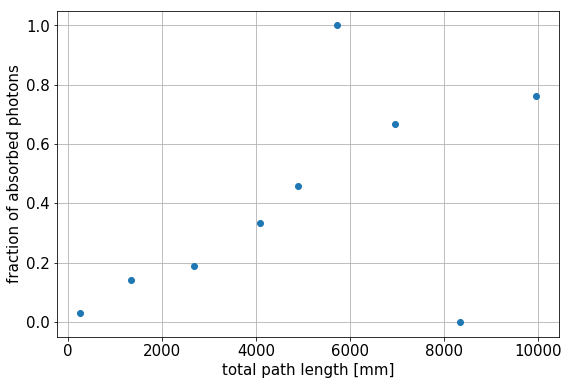

In [56]:
figure = plt.figure(figsize=(9,6));
ax = figure.add_subplot(1,1,1)
plt.plot( l_in_bin, frac_absorbed_in_bin , 'o')
ax.set_xlabel('total path length [mm]',fontsize=15)
ax.set_ylabel('fraction of absorbed photons',fontsize=15);
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
ax.set_aspect('auto')
ax.grid()

In [52]:
#THIS IS A PROBLEM: ITS SUPPOSE TO BE RISING AS A FUNCTION OF L